<a href="https://colab.research.google.com/github/thavs-college-repos/eb-2022-1-cc51/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Youtube data analysis
Analisaremos la informacion de youtube en Gran Breta;a analysis

## Set Up
### Importar Librerias

In [ ]:
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install --upgrade geopandas
# Install descartes - Geopandas requirment
!pip install descartes 

In [ ]:
import os
import csv
import json

import numpy as np
import pandas as pd
import geopandas as gpd
%matplotlib inline

import seaborn as sns
import scipy.stats as stats
import plotly.express as px
from matplotlib import pyplot as plt

In [ ]:
_mapbox_token = 'pk.eyJ1IjoidTIwMTcyNDQyMyIsImEiOiJjbDN2eHZpaDgwMHdrM2txcHd5YzlwempxIn0.iDkPaJgRqFMJjiBW8_gVEQ'

px.set_mapbox_access_token(_mapbox_token)

### Hoja de estilos

In [ ]:
pd.options.display.float_format = '{:.2f}'.format # format floats to 2 decimal places in output

sns.set(style="ticks")
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


### Cargar datos

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/thavs-college-repos/eb-2022-1-cc51/main/data/GBvideos_cc50.csv', quotechar='"')

### Inspeccionar los datos

In [ ]:
# Ver las primeras columnas de datos
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,lat,lon,geometry
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Devon,50.70,-3.53,POINT (-3.529950197 50.70040529)
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Manchester,53.50,-2.25,POINT (-2.247987103 53.50041526)
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Bath And North East Somerset,51.38,-2.35,POINT (-2.350022218 51.3837486)
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Aberdeen,57.17,-2.08,POINT (-2.079987021 57.17039797)
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Southampton,50.90,-1.40,POINT (-1.399976849 50.90003135)


In [ ]:
# Informacion del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                38916 non-null  object 
 1   trending_date           38916 non-null  object 
 2   title                   38916 non-null  object 
 3   channel_title           38916 non-null  object 
 4   category_id             38916 non-null  int64  
 5   publish_time            38916 non-null  object 
 6   tags                    38916 non-null  object 
 7   views                   38916 non-null  int64  
 8   likes                   38916 non-null  int64  
 9   dislikes                38916 non-null  int64  
 10  comment_count           38916 non-null  int64  
 11  thumbnail_link          38916 non-null  object 
 12  comments_disabled       38916 non-null  bool   
 13  ratings_disabled        38916 non-null  bool   
 14  video_error_or_removed  38916 non-null

Podemos ver que el dataset tiene `38.916` elementos. Y tambien se evidencia que todas las columnas estan completas a excepcion de la `description` pues muestra `38.304` valores. 

In [ ]:
# Visualizar la informacion estadistica del dataframe
df.describe()

,category_id,views,likes,dislikes,comment_count,lat,lon
count,38916.00,38916.00,38916.00,38916.00,38916.00,38916.00,38916.00
mean,16.83,5911943.63,134519.55,7612.56,13088.35,53.38,-2.38
std,7.75,19001209.95,349989.31,50956.83,50667.40,2.04,2.10
min,1.00,851.00,0.00,0.00,0.00,50.13,-7.33
25%,10.00,251527.25,5897.00,200.00,679.00,51.50,-3.53
50%,20.00,981889.00,25182.50,821.00,2478.00,53.20,-2.18
75%,24.00,3683628.50,114089.25,3357.50,9241.50,54.88,-1.08
max,43.00,424538912.00,5613827.00,1944971.00,1626501.00,58.97,1.30


Podemos analizar en esta tabla:
* En promedio un video en trending tiene `5.911.943` vistas. La media para la vistas es `981.889` es decir, el 50% de los videos tienen mas de este valor y el otro tiene menos. 
* El promedio de comentarios en estos video son `13.088` y la media es `2.478` 
* En promedio videos en tendencias tienen en promedio `134.519` me gustas y `7.612` no me gusta.

## Pre-procesar los datos

### Modificar valores vacios

Como mostramos previamente, la columna `description` contiene algunos valores nulos. Por ello debemos verificar y limpiar estas columnas antes de analizar el dataset. 

In [ ]:
df[df["description"].apply(lambda x: pd.isna(x))].head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
91,_wM_jY_rass,17.14.11,Bone on Labour HQ,Ross Kempsell,25,2017-11-06T16:12:58.000Z,[none],159065,1160,1164,0,https://i.ytimg.com/vi/_wM_jY_rass/default.jpg,True,False,False,NaN,Bristol,51.44999778,-2.583315472,POINT (-2.583315472 51.44999778)
118,8HON4AswPVk,17.14.11,Arvo Pärt - Tabula Rasa,JSaxofone,10,2012-09-13T12:35:46.000Z,"Arvo|""Pärt""|""Tabula""|""Rasa""|""part""|""violin""|""c...",728177,4007,71,240,https://i.ytimg.com/vi/8HON4AswPVk/default.jpg,False,False,False,NaN,Dungannon,54.52037884,-6.670016929,POINT (-6.670016929 54.52037884)


Para no dejar estos valores como `NA`, es mejor cambiar estoys valores a cadenas vacias.

In [ ]:
df["description"] = df["description"].fillna(value="") # Fillna con vacio

### Completar informacion de categorias

Antes de analizar los datos y para facilitar la visualizacion de datos, uniremos los valores de `category_id` con su representacion en el archivo `GB_category_id.json`. De esta forma no podremos colocar numbero en lugar

In [ ]:
df['category_id'].head(2)

0    26
1    24
Name: category_id, dtype: int64

In [ ]:
with open("data/GB_category_id.json") as f:
    categories = json.load(f)["items"]
    
cat_dict = {}
for cat in categories:
    cat_id = int(cat["id"])
    cat_dict[cat_id] = cat["snippet"]["title"]
    
df['category_name'] = df['category_id'].map(cat_dict)

### Modificar tipos
Modificar los tipos de las fechas a 

In [ ]:
df['publish_hour'] = pd.to_datetime(df["publish_time"]).dt.time
df['publish_time'] = pd.to_datetime(df["publish_time"]).dt.date
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%M').dt.date


## Visualizar los datos
### Por Categorias de Videos
#### ¿Qué categorías de videos son las de mayor tendencia?

In [ ]:
cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
cdf.head()

,category_name,No_of_videos
0,Music,13754
1,Entertainment,9124
2,People & Blogs,2926
3,Film & Animation,2577
4,Howto & Style,1928


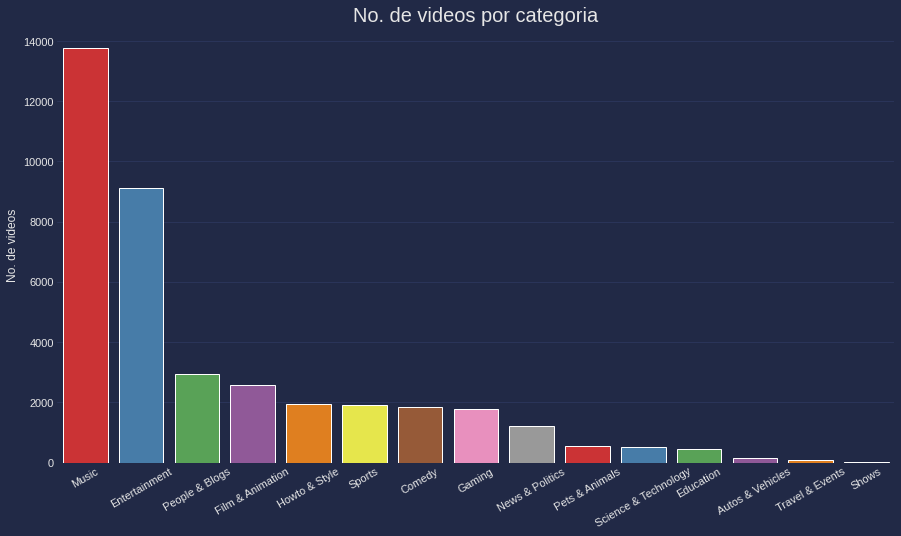

<Figure size 1008x1440 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()
plt.figure(figsize = (14,20))
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf, ax=ax, palette="Set1")
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
_ = ax.set(xlabel="", ylabel="No. de videos")
_ = ax.set_title("No. de videos por categoria", fontsize=20)

fig.set_size_inches(15, 8, forward=True)


Descripción: Es claro que la categoría de Música es la que tiene la mayor cantidad de videos en tendencias. Casi `14.000` videos en tendencias. Le sigue la categoría de Entretenimiento con unos `9.000` vídeos. Se evidencia que estas dos categorías contienen más del `50%` de todos los videos en tendencias. 

#### ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?
Debido a la variabilidad de los likes y dislikes en un video en relacion a otro, primero crearemos un nuevo df con dos nuevas columnas que nos apoyaran a visualizar mejor la data. Las columnas `likes_dis` and  `dislikes_dis` tendrán los valores de likes y dislikes como distribuciones normales para asi visualizar mejor la data.

In [ ]:
cld_df = df[['category_name']].copy()
cld_df['dislikes_dis'] = np.log(df['dislikes'] + 1)
cld_df['likes_dis'] = np.log(df['likes'] + 1)

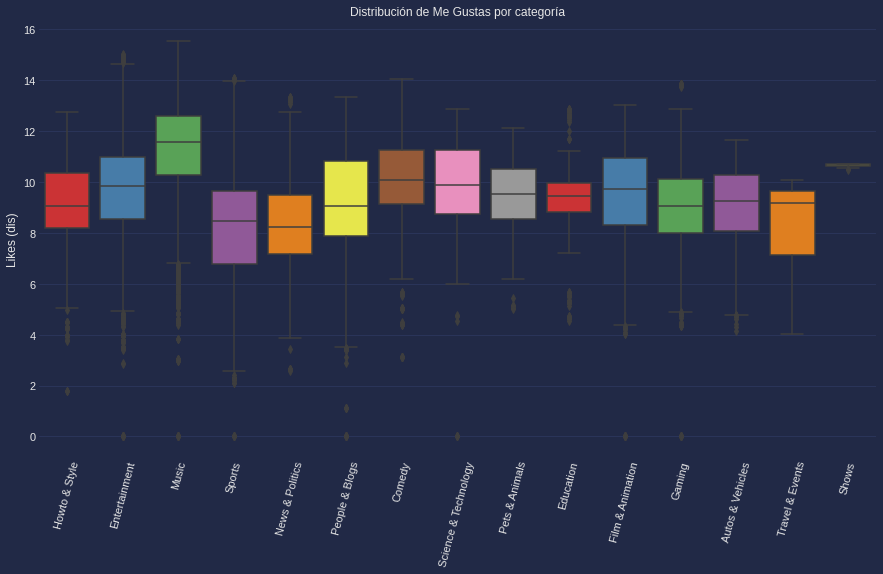

<Figure size 1008x1440 with 0 Axes>

In [ ]:
# Me gustas lik
fig, ax = plt.subplots()
plt.figure(figsize = (14,20))

g = sns.boxplot(x='category_name', y='likes_dis', data=cld_df, palette="Set1", ax=ax)
_ = ax.set(xlabel="", ylabel="Likes (dis)", title="Distribución de Me Gustas por categoría")
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
fig.set_size_inches(15, 8, forward=True)

plt.show()

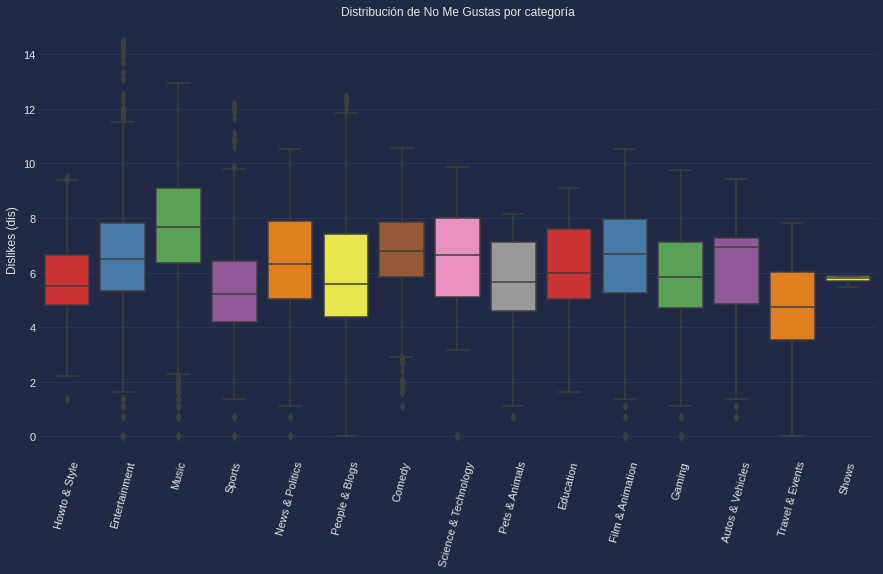

<Figure size 1008x1440 with 0 Axes>

In [ ]:
# Me gustas lik
fig, ax = plt.subplots()
plt.figure(figsize = (14,20))

g = sns.boxplot(x='category_name', y='dislikes_dis', data=cld_df, palette="Set1", ax=ax)
_ = ax.set(xlabel="", ylabel="Dislikes (dis)", title="Distribución de No Me Gustas por categoría")
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
fig.set_size_inches(15, 8, forward=True)


Por un lado, se evidencia que la categoría de `Música` es la que tiene la mayor cantidad de me gustas y parece ser la que más gusta, del mismo modo, es la categoría con la mayor cantidad de no me gustas. Debido al análisis anterior es entendible que a esta ser la categoría con el mayor número de video en tendencias tenga el mayor número de interacciones y valores outliers. 

Por otro lado, la categoría de `Entretenimiento` tiene la mayor cantidad de valores de no me gusta fuera del rango promedio. Es decir, a pesar de que la mayoría de los videos se encuentran en un rango estable de no me gustas, los videos menos gustados en este dataset de tendencia se encuentran en esta categoría. 

### Por la geografía del país
#### ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?

In [ ]:
g_map = df.groupby(["state", "lon", "lat"])


views_map = g_map['views'].sum().reset_index() 
likes_map = g_map['likes'].sum().reset_index() 
dislikes_map = g_map['dislikes'].sum().reset_index() 

##### Vistas

In [ ]:
fig = px.scatter_mapbox(views_map, lat="lat", lon="lon", zoom=4, height=450, 
                        color="views", hover_name="state", size="views", size_max=25,
                        color_continuous_scale=px.colors.sequential.Rainbow
                      )

print( views_map.sort_values(by=['views'], ascending=False).head() )
print( views_map.sort_values(by=['views']).head(2) )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

               state          lon         lat       views
39       Southampton -1.399976849 50.90003135  5570080346
0           Aberdeen -2.079987021 57.17039797  5482827742
41  Stockton On Tees -1.230013063 54.58037518  5458518084
38   South Yorkshire -1.499996583 53.36667666  5448546504
46     West Midlands -1.499996583 52.42040367  5368026416
         state          lon         lat       views
2      Belfast -5.960034425 54.60001223  3532467750
26  Merseyside -2.917997886 53.41600181  3646696350


En el gráfico se puede visualizar que existen tres zonas que se acercan a los `5.5B` de visitas. El estado con el mayor número de vistas es `Southampton` con `5.570.080.346` de vistas y el segundo con el mayor número es `Aberdeen` con `5.482.827.742`. Los estados con menos vistas son `Belfast` y `Merseyside` respectivamente.  

##### Me gustas

In [ ]:
fig = px.scatter_mapbox(likes_map, lat="lat", lon="lon", zoom=4, height=450, 
                        color="likes", hover_name="state", size="likes", size_max=25,
                        color_continuous_scale=px.colors.sequential.Rainbow
                      )

print( likes_map.sort_values(by=['likes'], ascending=False).head() )
print( likes_map.sort_values(by=['likes']).head(2) )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

                     state          lon         lat      likes
38         South Yorkshire -1.499996583 53.36667666  132686060
46           West Midlands -1.499996583 52.42040367  121579342
23               Leicester -1.133248943 52.62997744  121366689
12                   Devon -3.529950197 50.70040529  120366933
33  Perthshire And Kinross -3.469979697 56.40034161  119876590
      state          lon         lat     likes
2   Belfast -5.960034425 54.60001223  84331627
31    Omagh -7.300004315 54.60001223  85009092


En este gráfico se evidencia aún más claramente la zona con la mayor cantidad de Me gustas es `South Yorkshire` con más de `130M` de Me gustas le sigue después `West Midlands` con `121M`. Las regiones que menos interactuaron con el Me gusta fueron Belfast` y `Omagh`.

#### No Me Gusta

In [ ]:
fig = px.scatter_mapbox(dislikes_map, lat="lat", lon="lon", zoom=4, height=450, 
                        color="dislikes", hover_name="state", size="dislikes", size_max=25,
                        color_continuous_scale=px.colors.sequential.Rainbow
                      )

print( dislikes_map.sort_values(by=['dislikes'], ascending=False).head() )
print( dislikes_map.sort_values(by=['dislikes']).head(2) )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

                           state          lon         lat  dislikes
1   Bath And North East Somerset -2.350022218  51.3837486  12622353
39                   Southampton -1.399976849 50.90003135   8617820
38               South Yorkshire -1.499996583 53.36667666   8451143
19                    Inverclyde -4.750030763 55.93329002   8390226
17                       Glasgow -4.250707236 55.87440472   8385133
         state          lon         lat  dislikes
7      Cardiff  -3.22500757 51.49999473   3906929
26  Merseyside -2.917997886 53.41600181   3910656


Pocas regiones interactúan con el botón de No Me Gusta pero entre todas destaca `Bath And North East Somerset` con una gran cantidad de No Me Gustas en relación al resto de los estados. Exactamente la diferencia entre el primero y el segundo estado es de más de `4M` de No Me Gustas. 